In [1]:
import numpy as np
import graphviz
import matplotlib
!pip install pomegranate
!apt-get install -y graphviz-dev
!pip install pygraphviz

     |████████████████████████████████| 4.5MB 5.6MB/s 
  Created wheel for pomegranate: filename=pomegranate-0.13.5-cp36-cp36m-linux_x86_64.whl size=15238257 sha256=98dd2d1e3dd6fa4a661d9f15281841f16b7c5d11d9d83394a7dc6aa04460e916
  Stored in directory: /root/.cache/pip/wheels/99/d9/0a/0758302ccad41a61aa08ae4985b84d4cab5086e99c92a68560
Successfully built pomegranate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 14 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import json

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [3, 2]
mpl.rcParams['figure.dpi'] = 200

from matplotlib import pyplot as plt

import pomegranate as pg; print('pg: ' + pg.__version__)
import numpy as np; print('np: ' + np.__version__)

pg: 0.13.5
np: 1.18.5


In [10]:
from pomegranate import DiscreteDistribution, ConditionalProbabilityTable

familyHistory=DiscreteDistribution({True: 0.17,
                                    False: 0.83})

compFilm=DiscreteDistribution({True: 0.85,
                                      False: 0.03})

density=ConditionalProbabilityTable([
                                     [True, True, True,    0.15],
                                     [True, True, False,   0.16],
                                     [True, False, True,   0.04],
                                     [False, True, True,    0.7],
                                     [False, True, False,   0.7],
                                     [False, False, False, 0.04],
                                     [True, False, False, 0.003],
                                     [False, False, True,  0.26],

], [familyHistory, compFilm])

assess=ConditionalProbabilityTable([
                                    [True,  True,    0.9],
                                    [False, False,  0.15],
                                    [False, True,   0.09],
                                    [True,  False,  0.85],
], [density])

biophx=ConditionalProbabilityTable([
                                    [True,  True,   0.36],
                                    [False, False,  0.86],
                                    [True,  False,  0.24],
                                    [False, True,    0.6],
], [assess])

cancer=ConditionalProbabilityTable([
                                    [True,  True,     0.9],
                                    [False, False,   0.14],
                                    [False, True,     0.1],
                                    [True,  False,   0.86],
],[biophx])




In [3]:
from pomegranate import State
from pomegranate import BayesianNetwork
import ast
import json

In [8]:
familyHistoryNode=State(familyHistory, name="FamilyHistory")
compFilmNode=State(compFilm, name="CompFilm")
densityNode=State(density, name="Density")
assessNode=State(assess, name="Assess")

biophxNode=State(biophx, name="Biopsy")
cancerNode=State(cancer, name="Cancer")

In [9]:
model = BayesianNetwork("Patients density (partial)")

model.add_states(familyHistoryNode,
                        compFilmNode,
                        densityNode,
                        assessNode,
                        biophxNode,
                        cancerNode)

model.add_edge(familyHistoryNode, densityNode)
model.add_edge(compFilmNode, densityNode)
model.add_edge(densityNode, assessNode)
model.add_edge(assessNode, biophxNode)
model.add_edge(densityNode,cancerNode)

model.bake()

In [ ]:
from pomegranate.utils import plot_networkx
import time
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy
import networkx

numpy.random.seed(6)

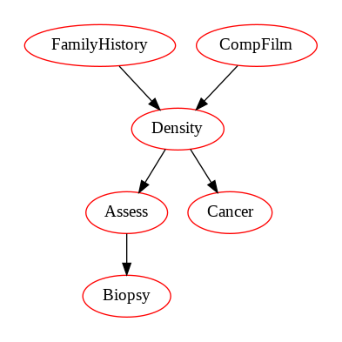

In [ ]:
import tempfile
import graphviz as pygraphviz 
import matplotlib.pyplot as plt


model.plot()

In [ ]:
from pomegranate import Distribution

def print_inference_result(inference_result: []):
  global model
  assert len(model.states) == len(inference_result)
  for i in range(len(model.states)):

    print(model.states[i].name + ':')

    if isinstance(inference_result[i], Distribution):

      for key in inference_result[i].parameters[0].keys():
        print('\t' + str(key) + ':\t' +
              ("%.4f" % inference_result[i].parameters[0][key]))
    else:
      print('\t' + str(inference_result[i]))
    print()

In [ ]:
evidence_set = {}

inference_result = model.predict_proba(evidence_set)
print_inference_result(inference_result)

FamilyHistory:
	True:	0.0421
	False:	0.9579

CompFilm:
	True:	0.9988
	False:	0.0012

Density:
	False:	0.0210
	True:	0.9790

Assess:
	False:	0.6986
	True:	0.3014

Biopsy:
	False:	0.5321
	True:	0.4679

Cancer:
	False:	0.4906
	True:	0.5094



In [ ]:
evidence_set = {"FamilyHistory": True,
                "CompFilm":    False,}

inference_result = model.predict_proba(evidence_set)
print_inference_result(inference_result)

FamilyHistory:
	True

CompFilm:
	False

Density:
	False:	0.0158
	True:	0.9842

Assess:
	False:	0.6982
	True:	0.3018

Biopsy:
	False:	0.5320
	True:	0.4680

Cancer:
	False:	0.4901
	True:	0.5099



In [ ]:
evidence_set = {"familyHistory": True,
                "compFilm":    True,
                "density":  True}

inference_result = model.predict_proba(evidence_set)
print_inference_result(inference_result)

FamilyHistory:
	True:	0.0421
	False:	0.9579

CompFilm:
	True:	0.9988
	False:	0.0012

Density:
	False:	0.0210
	True:	0.9790

Assess:
	False:	0.6986
	True:	0.3014

Biopsy:
	False:	0.5321
	True:	0.4679

Cancer:
	False:	0.4906
	True:	0.5094



In [ ]:
familyHistory_quantized=DiscreteDistribution({1: 0.17,
                                              0: 0.83})

compFilm_quantized=DiscreteDistribution({1: 0.85,
                                         0: 0.15})

density_quantized=ConditionalProbabilityTable([
                                     [1, 1, 1,   0.15],
                                     [1, 1, 0,   0.16],
                                     [1, 0, 1,  0.004],
                                     [0, 1, 1,    0.7],
                                     [0, 1, 0,    0.7],
                                     [0, 0, 0,   0.04],
                                     [1, 0, 0,  0.003],
                                     [0, 0, 1,   0.26],

], [familyHistory_quantized, compFilm_quantized])

assess_quantized=ConditionalProbabilityTable([
                                    [1,  1,  0.9],
                                    [0, 0,  0.15],
                                    [0, 1,   0.1],
                                    [1,  0, 0.85],
], [density_quantized])

biophx_quantized=ConditionalProbabilityTable([
                                    [1,  1, 0.36],
                                    [0, 0,  0.86],
                                    [1,  0, 0.24],
                                    [0, 1,   0.6],
], [assess_quantized])

cancer_quantized=ConditionalProbabilityTable([
                                    [1,  1,  0.9],
                                    [0, 0,  0.14],
                                    [0, 1,   0.1],
                                    [1,  0, 0.86],
],[density_quantized])

In [22]:
def generate_topological_samples(sample_count: int = 1) -> np.ndarray:
 
  global familyHistory_quantized, compFilm_quantized, density_quantized
  global assess_quantized, biophx_quantized, cancer_quantized
  
  result = []
  
  for i in range(sample_count):
    
   FH_sample = familyHistory_quantized.sample()
   CF_sample = compFilm_quantized.sample()
    
    
  B_sample = density_quantized.sample(parent_values={familyHistory_quantized: FH_sample,
                                                       compFilm_quantized: CF_sample})
    
  a_sample = assess_quantized.sample(parent_values={density_quantized: B_sample})
  b_sample = biophx_quantized.sample(parent_values={density_quantized: B_sample})
  c_sample = cancer_quantized.sample(parent_values={density_quantized: B_sample})
    
  result.append([FH_sample, CF_sample, base_sample,
                   a_sample, b_sample, c_sample])
    
  return np.array(result)

def new_model_from_samples(samples: np.ndarray) -> BayesianNetwork:
 
  learned_model = BayesianNetwork.from_samples(samples)
  state_names = ["familyHistory",
                        "compFilm",
                        "density",
                        "assess",
                        "biophx",
                        "cancer"]
  for i in range(len(learned_model.states)):
    learned_model.states[i].name = state_names[i]
  return learned_model

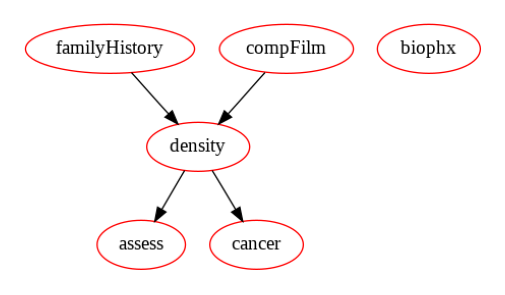

In [ ]:
num_samples = 1500000

samples = generate_topological_samples(num_samples)
learned_model = new_model_from_samples(samples)
learned_model.plot()